In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error

# Setting a random seed for reproducibility
np.random.seed(42)

# Data generation
n_samples = 100
weight = np.random.uniform(45, 120, n_samples)  # weight in the range of 45 to 120 kg
hair_length = np.random.uniform(0, 50, n_samples)  # hair length in the range of 0 to 50 cm (noise)
noise = np.random.normal(-10, 10, n_samples)  # noise with normal distribution
height = 0.45 * weight + 140 + noise  # height dependency on weight with added noise

# Creating DataFrame
data = pd.DataFrame({
    'Height': height,
    'Hair_Length': hair_length,
    'Weight': weight
})

# Printing 5 rows
data.head()



,Height,Hair_Length,Weight
0,156.090482,1.571459,73.090509
1,184.659145,31.820521,116.303573
2,177.885520,15.717799,99.899546
3,163.311210,25.428535,89.899386
4,174.173374,45.378324,56.701398


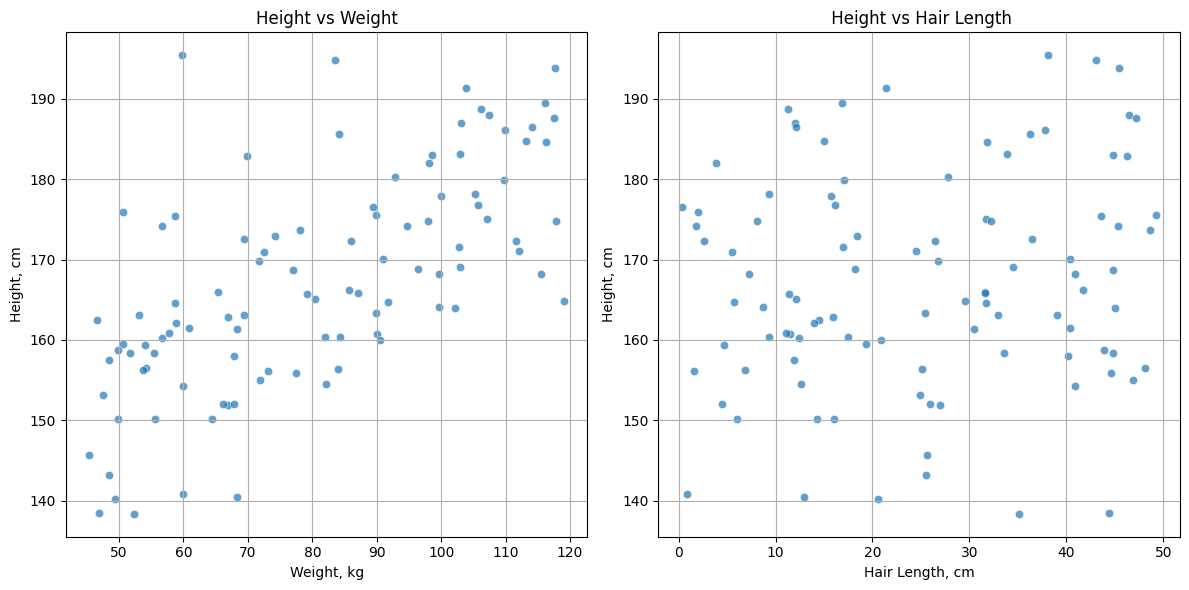

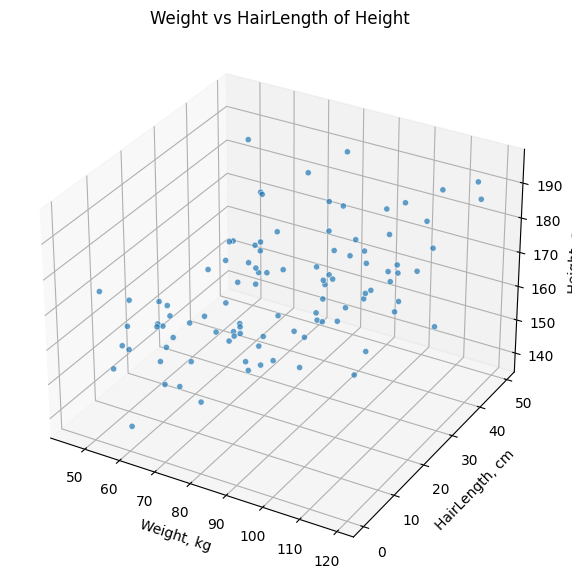

In [ ]:
# Data Vis
plt.figure(figsize=(12, 6))

# 2D plot: Income vs Years of Education
plt.subplot(1, 2, 1)
plt.scatter(data['Weight'], data['Height'], alpha=0.7, edgecolors='w', linewidth=0.5)
plt.title('Height vs Weight')
plt.xlabel('Weight, kg')
plt.ylabel('Height, cm')
plt.grid(True)

# 2D plot: Income vs Hours Watching TV
plt.subplot(1, 2, 2)
plt.scatter(data['Hair_Length'], data['Height'], alpha=0.7, edgecolors='w', linewidth=0.5)
plt.title(' Height vs Hair Length')
plt.xlabel('Hair Length, cm')
plt.ylabel('Height, cm')
plt.grid(True)

plt.tight_layout()
plt.show()

# 3D plot: Income vs Years of Education and Hours Watching TV
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Weight'], data['Hair_Length'], data['Height'], alpha=0.7, edgecolors='w', linewidth=0.5)
ax.set_title('Weight vs HairLength of Height')
ax.set_xlabel('Weight, kg')
ax.set_ylabel('HairLength, cm')
ax.set_zlabel('Height, cm')
plt.show()

In [3]:
# Features (X) and target (y)
X = data[['Weight', 'Hair_Length']]
y = data['Height']

# Fitting linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

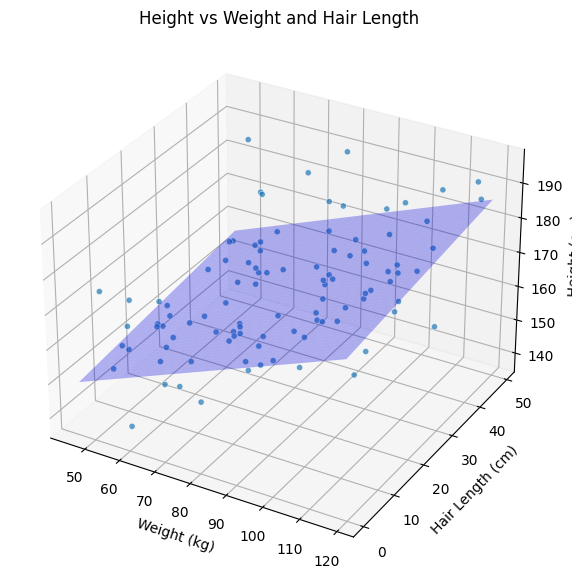

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [16]:
# Data visualization and regression plane
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Data points
ax.scatter(data['Weight'], data['Hair_Length'], data['Height'], alpha=0.7, edgecolors='w', linewidth=0.5)

# Creating a grid for the regression plane
x_surf, y_surf = np.meshgrid(np.linspace(data['Weight'].min(), data['Weight'].max(), 100),
                             np.linspace(data['Hair_Length'].min(), data['Hair_Length'].max(), 100))
z_surf = model.predict(np.c_[x_surf.ravel(), y_surf.ravel()]).reshape(x_surf.shape)

# Regression plane
ax.plot_surface(x_surf, y_surf, z_surf, color='b', alpha=0.3)

ax.set_title('Height vs Weight and Hair Length')
ax.set_xlabel('Weight (kg)')
ax.set_ylabel('Hair Length (cm)')
ax.set_zlabel('Height (cm)')

plt.show()

# 2D plot: height vs weight
plt.figure(figsize=(12, 6))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature n

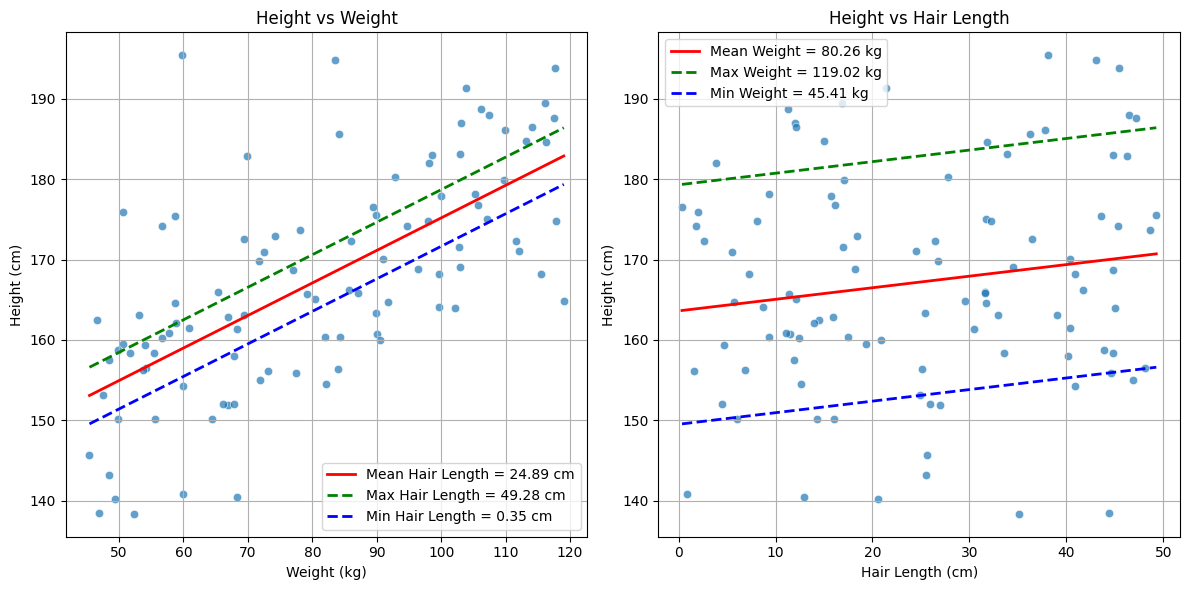

In [7]:
# Creating values for weight in the range [min, max]
weight_range = np.linspace(data['Weight'].min(), data['Weight'].max(), 100)
# Mean, maximum, and minimum hair length
mean_hair_length = np.mean(data['Hair_Length'])
max_hair_length = np.max(data['Hair_Length'])
min_hair_length = np.min(data['Hair_Length'])

# Predicted height values for 2D plot (height vs weight with fixed hair length)
predicted_height_weight = model.predict(np.c_[weight_range, np.full(weight_range.shape, mean_hair_length)])
predicted_height_max_hair_length = model.predict(np.c_[weight_range, np.full(weight_range.shape, max_hair_length)])
predicted_height_min_hair_length = model.predict(np.c_[weight_range, np.full(weight_range.shape, min_hair_length)])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data['Weight'], data['Height'], alpha=0.7, edgecolors='w', linewidth=0.5)
plt.plot(weight_range, predicted_height_weight, color='red', linewidth=2, label=f'Mean Hair Length = {mean_hair_length:.2f} cm')
plt.plot(weight_range, predicted_height_max_hair_length, color='green', linestyle='--', linewidth=2, label=f'Max Hair Length = {max_hair_length:.2f} cm')
plt.plot(weight_range, predicted_height_min_hair_length, color='blue', linestyle='--', linewidth=2, label=f'Min Hair Length = {min_hair_length:.2f} cm')
plt.title('Height vs Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.grid(True)
plt.legend()

# Creating values for hair length in the range [min, max]
hair_length_range = np.linspace(data['Hair_Length'].min(), data['Hair_Length'].max(), 100)
# Mean, maximum, and minimum weight
mean_weight = np.mean(data['Weight'])
max_weight = np.max(data['Weight'])
min_weight = np.min(data['Weight'])

# Predicted height values for 2D plot (height vs hair length with fixed weight)
predicted_height_hair = model.predict(np.c_[np.full(hair_length_range.shape, mean_weight), hair_length_range])
predicted_height_max_weight = model.predict(np.c_[np.full(hair_length_range.shape, max_weight), hair_length_range])
predicted_height_min_weight = model.predict(np.c_[np.full(hair_length_range.shape, min_weight), hair_length_range])

plt.subplot(1, 2, 2)
plt.scatter(data['Hair_Length'], data['Height'], alpha=0.7, edgecolors='w', linewidth=0.5)
plt.plot(hair_length_range, predicted_height_hair, color='red', linewidth=2, label=f'Mean Weight = {mean_weight:.2f} kg')
plt.plot(hair_length_range, predicted_height_max_weight, color='green', linestyle='--', linewidth=2, label=f'Max Weight = {max_weight:.2f} kg')
plt.plot(hair_length_range, predicted_height_min_weight, color='blue', linestyle='--', linewidth=2, label=f'Min Weight = {min_weight:.2f} kg')
plt.title('Height vs Hair Length')
plt.xlabel('Hair Length (cm)')
plt.ylabel('Height (cm)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


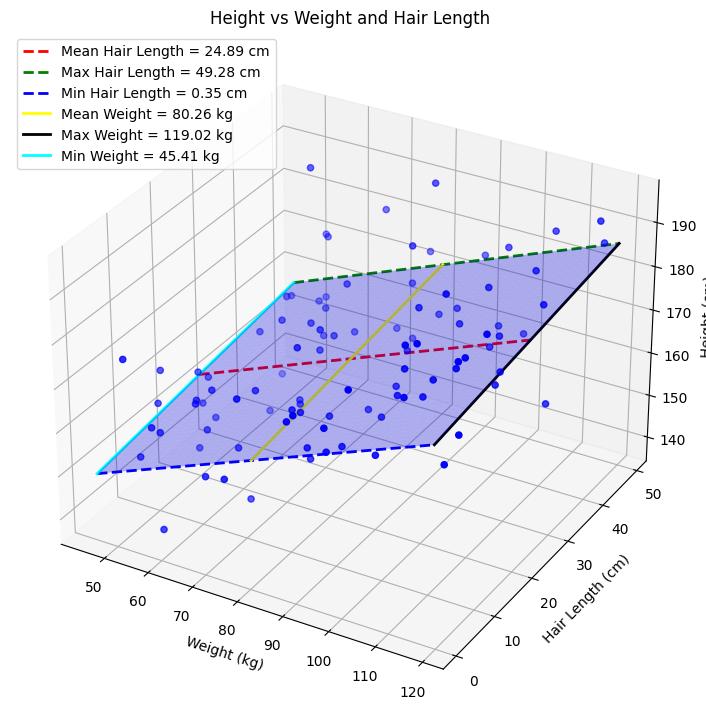

In [8]:
# Creating a grid for the regression plane
x_surf, y_surf = np.meshgrid(np.linspace(data['Weight'].min(), data['Weight'].max(), 100),
                             np.linspace(data['Hair_Length'].min(), data['Hair_Length'].max(), 100))
z_surf = model.predict(np.c_[x_surf.ravel(), y_surf.ravel()]).reshape(x_surf.shape)

# Plotting a 3D graph
fig = plt.figure(figsize=(10, 8))

# Adjusting space around the graph and axes
left, width = 0.05, 0.9
bottom, height = 0.05, 0.85
rect = [left, bottom, width, height]

# Creating axes
ax = fig.add_subplot(111, projection='3d', position=rect)

# Regression plane
ax.plot_surface(x_surf, y_surf, z_surf, color='b', alpha=0.3)

# Creating values for weight in the range [min, max]
# Representing data in a 2D plot
ax.scatter(data['Weight'], data['Hair_Length'], data['Height'], color='blue')

# Predicted values for mean hair length
ax.plot(weight_range, np.full(weight_range.shape, mean_hair_length), predicted_height_weight, color='red', linestyle='--', linewidth=2, label=f'Mean Hair Length = {mean_hair_length:.2f} cm')
# Predicted values for maximum hair length
ax.plot(weight_range, np.full(weight_range.shape, max_hair_length), predicted_height_max_hair_length, color='green', linestyle='--', linewidth=2, label=f'Max Hair Length = {max_hair_length:.2f} cm')
# Predicted values for minimum hair length
ax.plot(weight_range, np.full(weight_range.shape, min_hair_length), predicted_height_min_hair_length, color='blue', linestyle='--', linewidth=2, label=f'Min Hair Length = {min_hair_length:.2f} cm')

ax.plot(np.full(hair_length_range.shape, mean_weight), hair_length_range, predicted_height_hair, color='yellow', linewidth=2, label=f'Mean Weight = {mean_weight:.2f} kg')
# Predicted values for maximum weight
ax.plot(np.full(hair_length_range.shape, max_weight), hair_length_range, predicted_height_max_weight, color='black', linewidth=2, label=f'Max Weight = {max_weight:.2f} kg')
# Predicted values for minimum weight
ax.plot(np.full(hair_length_range.shape, min_weight), hair_length_range, predicted_height_min_weight, color='cyan', linewidth=2, label=f'Min Weight = {min_weight:.2f} kg')

# Setting labels and titles
ax.set_xlabel('Weight (kg)')
ax.set_ylabel('Hair Length (cm)')
ax.set_zlabel('Height (cm)')
ax.set_title('Height vs Weight and Hair Length')
ax.legend(loc='upper left')
# Setting the view angle
# Show the graph

plt.show()


In [9]:
# Outputting the coefficients of the linear regression (weights)
print("Weights:")
print("Weight:", model.coef_[0])
print("Hair Length:", model.coef_[1])
print("Intercept:", model.intercept_)


Weights:
Weight: 0.4044366238630154
Hair Length: 0.14386228202013482
Intercept: 131.15645229066504


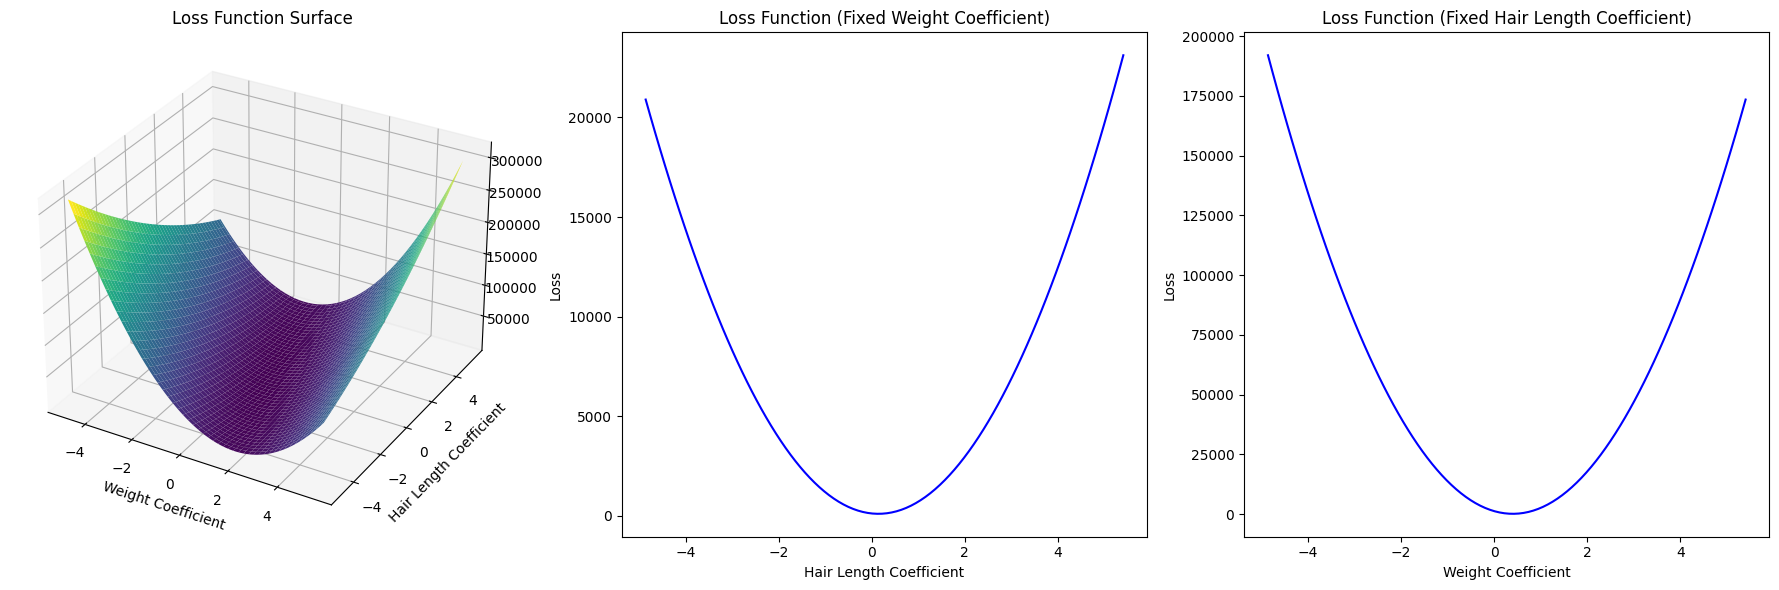

In [10]:
# Data (replace with your own data)
X = data[['Weight', 'Hair_Length']].values
y = data['Height'].values

# Train the model to get initial coefficients
model = LinearRegression()
model.fit(X, y)
intercept = model.intercept_
coefficients = model.coef_

# Range of values for the coefficients
coef_range = np.linspace(coefficients.min() - 5, coefficients.max() + 5, 100)
coef1, coef2 = np.meshgrid(coef_range, coef_range)

# Compute the loss function for each combination of coefficients
loss = np.zeros_like(coef1)
for i in range(coef1.shape[0]):
    for j in range(coef1.shape[1]):
        y_pred = intercept + coef1[i, j] * X[:, 0] + coef2[i, j] * X[:, 1]
        loss[i, j] = mean_squared_error(y, y_pred)

# 3D visualization of the loss function
fig = plt.figure(figsize=(18, 6))

ax = fig.add_subplot(131, projection='3d')
ax.plot_surface(coef1, coef2, loss, cmap='viridis')
ax.set_title('Loss Function Surface')
ax.set_xlabel('Weight Coefficient')
ax.set_ylabel('Hair Length Coefficient')

# 2D projection of the loss function for a fixed weight coefficient
fixed_coef_weight = coefficients[0]
loss_fixed_weight = []
for c2 in coef_range:
    y_pred = intercept + fixed_coef_weight * X[:, 0] + c2 * X[:, 1]
    loss_fixed_weight.append(mean_squared_error(y, y_pred))

ax = fig.add_subplot(132)
ax.plot(coef_range, loss_fixed_weight, color='blue')
ax.set_title('Loss Function (Fixed Weight Coefficient)')
ax.set_xlabel('Hair Length Coefficient')
ax.set_ylabel('Loss')

# 2D projection of the loss function for a fixed hair length coefficient
fixed_coef_hair_length = coefficients[1]
loss_fixed_hair_length = []
for c1 in coef_range:
    y_pred = intercept + c1 * X[:, 0] + fixed_coef_hair_length * X[:, 1]
    loss_fixed_hair_length.append(mean_squared_error(y, y_pred))

ax = fig.add_subplot(133)
ax.plot(coef_range, loss_fixed_hair_length, color='blue')
ax.set_title('Loss Function (Fixed Hair Length Coefficient)')
ax.set_xlabel('Weight Coefficient')
ax.set_ylabel('Loss')

# Adding space between plots
plt.subplots_adjust(wspace=0.4)  # Adjust the width space between plots

plt.tight_layout()
plt.show()


In [11]:
# Create and train the model with L1 regularization (Lasso)
lasso_model = Lasso(alpha=0.2)  # set the regularization parameter (alpha)
lasso_model.fit(X, y)

# Print the model coefficients
print("L1 (Lasso) Regularization:")
print("Coefficients (weights) for features:")
print("Weight:", lasso_model.coef_[0])
print("Hair Length:", lasso_model.coef_[1])
print("Intercept:", lasso_model.intercept_)



L1 (Lasso) Regularization:
Coefficients (weights) for features:
Weight: 0.40400928271036346
Hair Length: 0.1428995737800741
Intercept: 131.21471554619887


In [12]:
# Create alpha values
alphas = [0.01, 0.1, 1, 10, 20, 50]

# Create and train models for each alpha value
lasso_weights = []
ridge_weights = []
elasticnet_weights = []

for alpha in alphas:
    # Lasso regression
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X, y)
    lasso_weights.append(lasso_model.coef_)

    # Ridge regression
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X, y)
    ridge_weights.append(ridge_model.coef_)

    # ElasticNet regression
    elasticnet_model = ElasticNet(alpha=alpha, l1_ratio=0.5)  # l1_ratio=0.5 for equal weighting of L1 and L2 regularization
    elasticnet_model.fit(X, y)
    elasticnet_weights.append(elasticnet_model.coef_)

# Print the results
print("+-------------+----------------------------+---------------------------+-------------------------------+")
print("|   Lambda    |          Lasso             |          Ridge            |          ElasticNet           |")
print("+-------------+----------------------------+---------------------------+-------------------------------+")

for i, alpha in enumerate(alphas):
    print(f"|   {alpha:<9}  | {lasso_weights[i]}   |   {ridge_weights[i]} |   {elasticnet_weights[i]}     |")

print("+--------------+---------------------------+---------------------------+-------------------------------+")


+-------------+----------------------------+---------------------------+-------------------------------+
|   Lambda    |          Lasso             |          Ridge            |          ElasticNet           |
+-------------+----------------------------+---------------------------+-------------------------------+
|   0.01       | [0.40441525 0.14381415]   |   [0.40443654 0.14386221] |   [0.40442175 0.14383462]     |
|   0.1        | [0.40422295 0.14338093]   |   [0.40443579 0.14386156] |   [0.40428797 0.14358568]     |
|   1          | [0.40229994 0.13904874]   |   [0.40442826 0.14385508] |   [0.40295157 0.14110213]     |
|   10         | [0.38306978 0.09572688]   |   [0.40435297 0.14379033] |   [0.38973313 0.11683893]     |
|   20         | [0.36170294 0.04759148]   |   [0.40426935 0.14371844] |   [0.37534899 0.09104515]     |
|   50         | [0.29976664 0.        ]   |   [0.4040187  0.14350319] |   [0.33400356 0.02026016]     |
+--------------+---------------------------+-----------

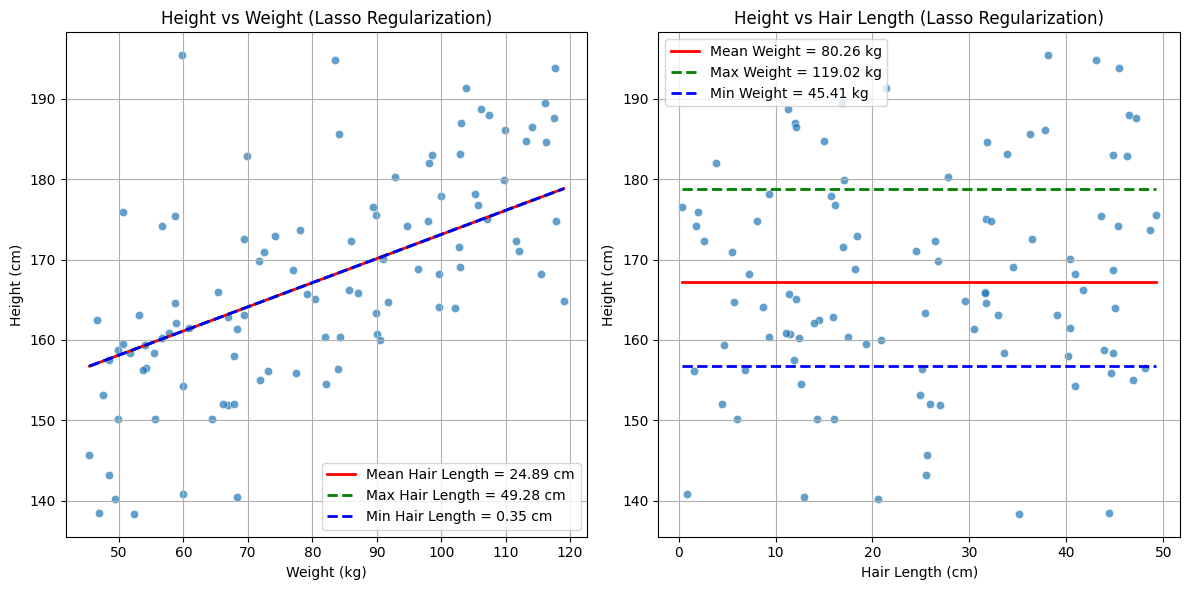

In [13]:
# Train the Lasso model with L1 regularization and alpha = 50
lasso_model = Lasso(alpha=50)
lasso_model.fit(X, y)

# Create values for weight in the range [min, max]
weight_range = np.linspace(data['Weight'].min(), data['Weight'].max(), 100)
# Mean, maximum, and minimum values for hair length
mean_hair_length = np.mean(data['Hair_Length'])
max_hair_length = np.max(data['Hair_Length'])
min_hair_length = np.min(data['Hair_Length'])

# Predicted height values for 2D plot (height as a function of weight with fixed hair length)
predicted_height_weight = lasso_model.predict(np.c_[weight_range, np.full(weight_range.shape, mean_hair_length)])
predicted_height_max_hair_length = lasso_model.predict(np.c_[weight_range, np.full(weight_range.shape, max_hair_length)])
predicted_height_min_hair_length = lasso_model.predict(np.c_[weight_range, np.full(weight_range.shape, min_hair_length)])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data['Weight'], data['Height'], alpha=0.7, edgecolors='w', linewidth=0.5)
plt.plot(weight_range, predicted_height_weight, color='red', linewidth=2, label=f'Mean Hair Length = {mean_hair_length:.2f} cm')
plt.plot(weight_range, predicted_height_max_hair_length, color='green', linestyle='--', linewidth=2, label=f'Max Hair Length = {max_hair_length:.2f} cm')
plt.plot(weight_range, predicted_height_min_hair_length, color='blue', linestyle='--', linewidth=2, label=f'Min Hair Length = {min_hair_length:.2f} cm')
plt.title('Height vs Weight (Lasso Regularization)')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.grid(True)
plt.legend()

# Create values for hair length in the range [min, max]
hair_length_range = np.linspace(data['Hair_Length'].min(), data['Hair_Length'].max(), 100)
# Mean, maximum, and minimum values for weight
mean_weight = np.mean(data['Weight'])
max_weight = np.max(data['Weight'])
min_weight = np.min(data['Weight'])

# Predicted height values for 2D plot (height as a function of hair length with fixed weight)
predicted_height_hair = lasso_model.predict(np.c_[np.full(hair_length_range.shape, mean_weight), hair_length_range])
predicted_height_max_weight = lasso_model.predict(np.c_[np.full(hair_length_range.shape, max_weight), hair_length_range])
predicted_height_min_weight = lasso_model.predict(np.c_[np.full(hair_length_range.shape, min_weight), hair_length_range])

plt.subplot(1, 2, 2)
plt.scatter(data['Hair_Length'], data['Height'], alpha=0.7, edgecolors='w', linewidth=0.5)
plt.plot(hair_length_range, predicted_height_hair, color='red', linewidth=2, label=f'Mean Weight = {mean_weight:.2f} kg')
plt.plot(hair_length_range, predicted_height_max_weight, color='green', linestyle='--', linewidth=2, label=f'Max Weight = {max_weight:.2f} kg')
plt.plot(hair_length_range, predicted_height_min_weight, color='blue', linestyle='--', linewidth=2, label=f'Min Weight = {min_weight:.2f} kg')
plt.title('Height vs Hair Length (Lasso Regularization)')
plt.xlabel('Hair Length (cm)')
plt.ylabel('Height (cm)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

#Here we can see decreased variance for hair_length and overall improvement


In [14]:
 import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score
import pandas as pd

X = data[['Weight', 'Hair_Length']]
y = data['Height']

# Train the model without regularization
model_lr = LinearRegression()
scores_lr = cross_val_score(model_lr, X, y, cv=5, scoring='neg_mean_squared_error')
mean_score_lr = -np.mean(scores_lr)
std_score_lr = np.std(scores_lr)

# Train the model with L1 regularization (Lasso)
alpha = 10  # Set the value of alpha
model_l1 = Lasso(alpha=alpha)
scores_l1 = cross_val_score(model_l1, X, y, cv=5, scoring='neg_mean_squared_error')
mean_score_l1 = -np.mean(scores_l1)
std_score_l1 = np.std(scores_l1)

# Train the model with L2 regularization (Ridge)
model_l2 = Ridge(alpha=alpha)
scores_l2 = cross_val_score(model_l2, X, y, cv=5, scoring='neg_mean_squared_error')
mean_score_l2 = -np.mean(scores_l2)
std_score_l2 = np.std(scores_l2)

# Output the results
print(f"Linear Regression: Mean MSE = {mean_score_lr:.4f}, Std MSE = {std_score_lr:.4f}")
print(f"Lasso Regression (L1): Mean MSE = {mean_score_l1:.4f}, Std MSE = {std_score_l1:.4f}")
print(f"Ridge Regression (L2): Mean MSE = {mean_score_l2:.4f}, Std MSE = {std_score_l2:.4f}")


Linear Regression: Mean MSE = 99.2760, Std MSE = 14.2176
Lasso Regression (L1): Mean MSE = 99.6586, Std MSE = 13.6193
Ridge Regression (L2): Mean MSE = 99.2730, Std MSE = 14.2148
